### Question:
What are factors that are significantly associated with survival on the Titanic?

In [1]:
import os

os.chdir ("C:\\Users\\Jenn\\Desktop\\python")

In [2]:
# Import titanic_data as a pandas DataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency

titanic_df = pd.read_csv('titanic_data.csv')

# Looking at the data 
#titanic_df.head(5)

In [3]:
# Run some descriptive statistics

titanic_df.describe()
# Some people are missing age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#double checking no duplicates

len(titanic_df['PassengerId'].unique())
#891 unique IDs

891

In [5]:
# getting frequencies
def count_of (column):
    number = titanic_df.groupby(column).PassengerId.count()
    return number

In [6]:
count_of ("Survived")

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [7]:
count_of ("SibSp")

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

In [8]:
count_of ("Pclass")

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [9]:
count_of ("Sex")

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [10]:
# Getting the column pcts
def count_Pct_of (column):
    number = titanic_df.groupby(column).PassengerId.count()
    colsum_stat = int(number.sum(axis=0))
    colsum_pct = 100.0 * (number/colsum_stat)
    
    Table_freq = pd.concat ([number, colsum_pct], axis = 1)
    Table_freq.columns = ['Num', 'Pct']
    return Table_freq


In [11]:
#Analyzing factors associated with survival
#Outcome: Survival
    
count_Pct_of ("Survived")

,Num,Pct
Survived,,
0,549,61.616162
1,342,38.383838


In [12]:
count_Pct_of ("Sex")

#More males than females

,Num,Pct
Sex,,
female,314,35.241302
male,577,64.758698


In [13]:
count_Pct_of ("SibSp")
#Most did not have fam/siblings on board

,Num,Pct
SibSp,,
0,608,68.237935
1,209,23.456790
2,28,3.142536
3,16,1.795735
4,18,2.020202
5,5,0.561167
8,7,0.785634


In [14]:
count_Pct_of ("Pclass")
#a quarter are upper class 

,Num,Pct
Pclass,,
1,216,24.242424
2,184,20.650954
3,491,55.106622


In [15]:
# Recategorizing to no siblings and at least 1 sibling
def change_sib (siblings):
    if siblings == 0:
        return 0
    elif siblings >= 1:
        return 1

In [16]:
titanic_df['SibSp_cat'] = titanic_df['SibSp'].apply(change_sib) 

In [17]:
#titanic_df.head(5)

In [18]:
# how many missing age?
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SibSp_cat        0
dtype: int64

In [19]:
#fill a negative # for those with missing ages
titanic_df['Age'] = titanic_df ['Age'].fillna(-99)
#titanic_df.head(5)

In [20]:
#looking at mean age - will have to take out missing values that I assigned as -99
No_missing_age = titanic_df ['Age'] > 0
titanic_df2 = titanic_df [No_missing_age]

titanic_df2.Age.mean()

29.69911764705882

In [21]:
#show plots in the notebook
%matplotlib inline

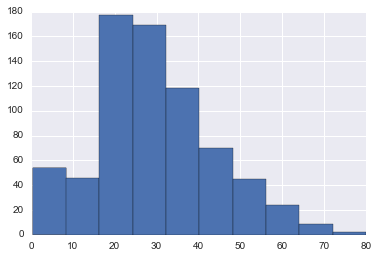

In [22]:
#histogram
titanic_df2.Age.hist()

In [23]:
titanic_df ['Survived_cat'] = np.where(titanic_df['Survived'] == 1, 'Survived', 'Not Survived') 
titanic_df ['SibSp_cat2'] = np.where(titanic_df['SibSp_cat'] == 1, 'At least one sib/spouse', 'No sib/spouse') 

In [24]:
def change_age_cat (age):
    if age < 0:
        return None
    if age < 18:
        return '<18 years old'
    if age < 30:
        return '18-29 years old'
    if age < 50:
        return '30-49 years old'
    else:
        return '50+ years old'

In [25]:
titanic_df ['age_cat_desc'] = titanic_df['Age'].apply(change_age_cat)

In [26]:
def SES_desc (value):
    if value == 1:
        return 'Upper'
    elif value ==2:
        return 'Middle'
    elif value == 3:
        return 'Lower'

In [27]:
titanic_df ['SES_cat_desc'] = titanic_df['Pclass'].apply(SES_desc)

### Visualizing data

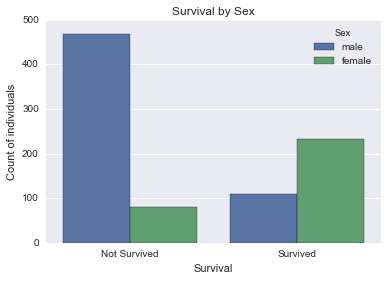

In [28]:
#Survival by Sex
sns.countplot (x = 'Survived_cat', hue = 'Sex', data = titanic_df)
plt.title ('Survival by Sex')
plt.xlabel ('Survival')
plt.ylabel ('Count of individuals')

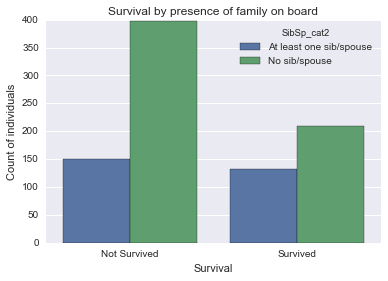

In [29]:
#("Survival by presence of family on board")

sns.countplot (x = 'Survived_cat', hue = 'SibSp_cat2', data = titanic_df)
plt.title("Survival by presence of family on board")
plt.xlabel ("Survival")
plt.ylabel ('Count of individuals')

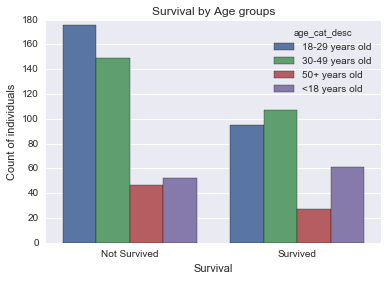

In [30]:
#Survival by Age Group
sns.countplot (x = 'Survived_cat', hue = 'age_cat_desc', data = titanic_df)
plt.title("Survival by Age groups")
plt.xlabel ("Survival")
plt.ylabel ('Count of individuals')

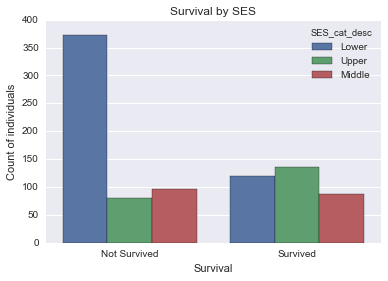

In [31]:
#Survival by SES
sns.countplot (x = 'Survived_cat', hue = 'SES_cat_desc', data = titanic_df)
plt.title("Survival by SES")
plt.xlabel ("Survival")
plt.ylabel ('Count of individuals')

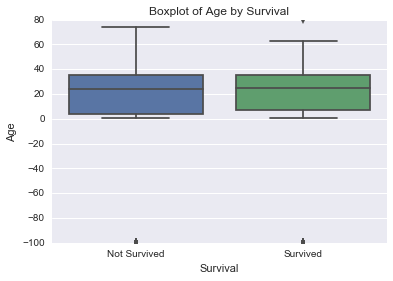

In [32]:
#Boxplot of Age by Survival
sns.boxplot (x='Survived_cat', y = 'Age', data = titanic_df)
plt.title ('Boxplot of Age by Survival')
plt.xlabel ('Survival')

### Survival rates

In [33]:
Sex_crosstab = pd.crosstab( titanic_df['Sex'], titanic_df['Survived'])
Sib_crosstab = pd.crosstab( titanic_df['SibSp_cat'], titanic_df['Survived'])
Age_crosstab = pd.crosstab( titanic_df['age_cat_desc'], titanic_df['Survived'])
Class_crosstab = pd.crosstab( titanic_df['Pclass'], titanic_df['Survived'])

In [34]:
Sex_crosstab

Survived,0,1
Sex,,
female,81,233
male,468,109


In [35]:
#get ROW percentages for each of the above (SURVIVAL RATE)
def row_pct(value):
    print (value.apply(lambda r: r/r.sum(), axis=1))
    

In [36]:
row_pct (Sex_crosstab)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


* Among all females, 75% survived and 25% died
* Among all males, 19% survived and 81% died

In [37]:
row_pct(Sib_crosstab)

Survived          0         1
SibSp_cat                    
0          0.654605  0.345395
1          0.533569  0.466431


* Among those with no siblings/spouses, 35% surived and 65% died
* Among all those with at least one sibling/spouse, 47% survived and 53% died

In [38]:
row_pct(Age_crosstab)

Survived                0         1
age_cat_desc                       
18-29 years old  0.649446  0.350554
30-49 years old  0.582031  0.417969
50+ years old    0.635135  0.364865
<18 years old    0.460177  0.539823


* Among those younger than 18 years old, 54% survived
* Among those 18-29 years old, 35% survived
* Among those 31-49, 41% survived
* Among those 50 and older, 31% survived


In [39]:
row_pct(Class_crosstab)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


* Among those categorized as upper class, 63% survived
* Among those categorized as middle class, 47% survived
* Among those categorized as lower class, 24% survived

### Statistical tests (chi sq)

In [40]:
#Chi sq function
def chi_sq (value):
    chi = chi2_contingency(value)
    print (chi)

In [41]:
chi_sq (Sex_crosstab)

(260.71702016732104, 1.1973570627755645e-58, 1, array([[ 193.47474747,  120.52525253],
       [ 355.52525253,  221.47474747]]))


In [42]:
chi_sq (Sib_crosstab)

(11.45562814125045, 0.00071277791477961474, 1, array([[ 374.62626263,  233.37373737],
       [ 174.37373737,  108.62626263]]))


In [43]:
chi_sq (Age_crosstab)

(12.5155387374942, 0.0058105037167187745, 3, array([[ 160.92997199,  110.07002801],
       [ 152.02240896,  103.97759104],
       [  43.94397759,   30.05602241],
       [  67.10364146,   45.89635854]]))


In [44]:
chi_sq (Class_crosstab)

(102.88898875696056, 4.5492517112987927e-23, 2, array([[ 133.09090909,   82.90909091],
       [ 113.37373737,   70.62626263],
       [ 302.53535354,  188.46464646]]))
